In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set()

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.shape

(400, 26)

In [4]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

df.isnull().sum()

In [5]:
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df_imputed.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

In [8]:
print(df_imputed["rc"].mode())
print(df_imputed["wc"].mode())
print(df_imputed["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [9]:
df_imputed["classification"] = df_imputed["classification"].apply(lambda x : 'ckd' if x=="ckd\t" else x)
df_imputed["cad"] = df_imputed["cad"].apply(lambda x : 'no' if x=="\tno" else x)

df_imputed["dm"] = df_imputed["dm"].apply(lambda x : 'no' if x=="\tno" else x)
df_imputed["dm"] = df_imputed["dm"].apply(lambda x : 'yes' if x=="\tyes" else x)
df_imputed["dm"] = df_imputed["dm"].apply(lambda x : 'yes' if x==" yes" else x)

df_imputed["rc"] = df_imputed["rc"].apply(lambda x : '5.2' if x=="\t?" else x)

df_imputed["wc"] = df_imputed["wc"].apply(lambda x : '9800' if x=="\t6200" else x)
df_imputed["wc"] = df_imputed["wc"].apply(lambda x : '9800' if x=="\t8400" else x)
df_imputed["wc"] = df_imputed["wc"].apply(lambda x : '9800' if x=="\t?" else x)

df_imputed["pcv"] = df_imputed["pcv"].apply(lambda x : '41' if x=="\t43" else x)
df_imputed["pcv"] = df_imputed["pcv"].apply(lambda x : '41' if x=="\t?" else x)


In [10]:
for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

AxesSubplot(0.125,0.11;0.775x0.77)


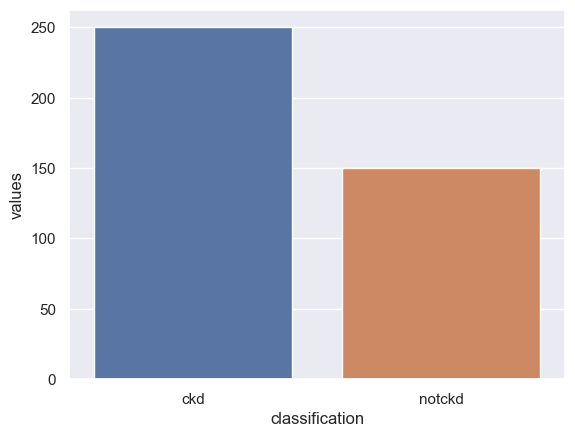

In [11]:
temp = df_imputed["classification"].value_counts()
temp_df = pd.DataFrame({"classification":temp.index,"values":temp.values})
print(sns.barplot(x="classification",y="values",data=temp_df))

In [12]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [13]:
df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object


In [14]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [15]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


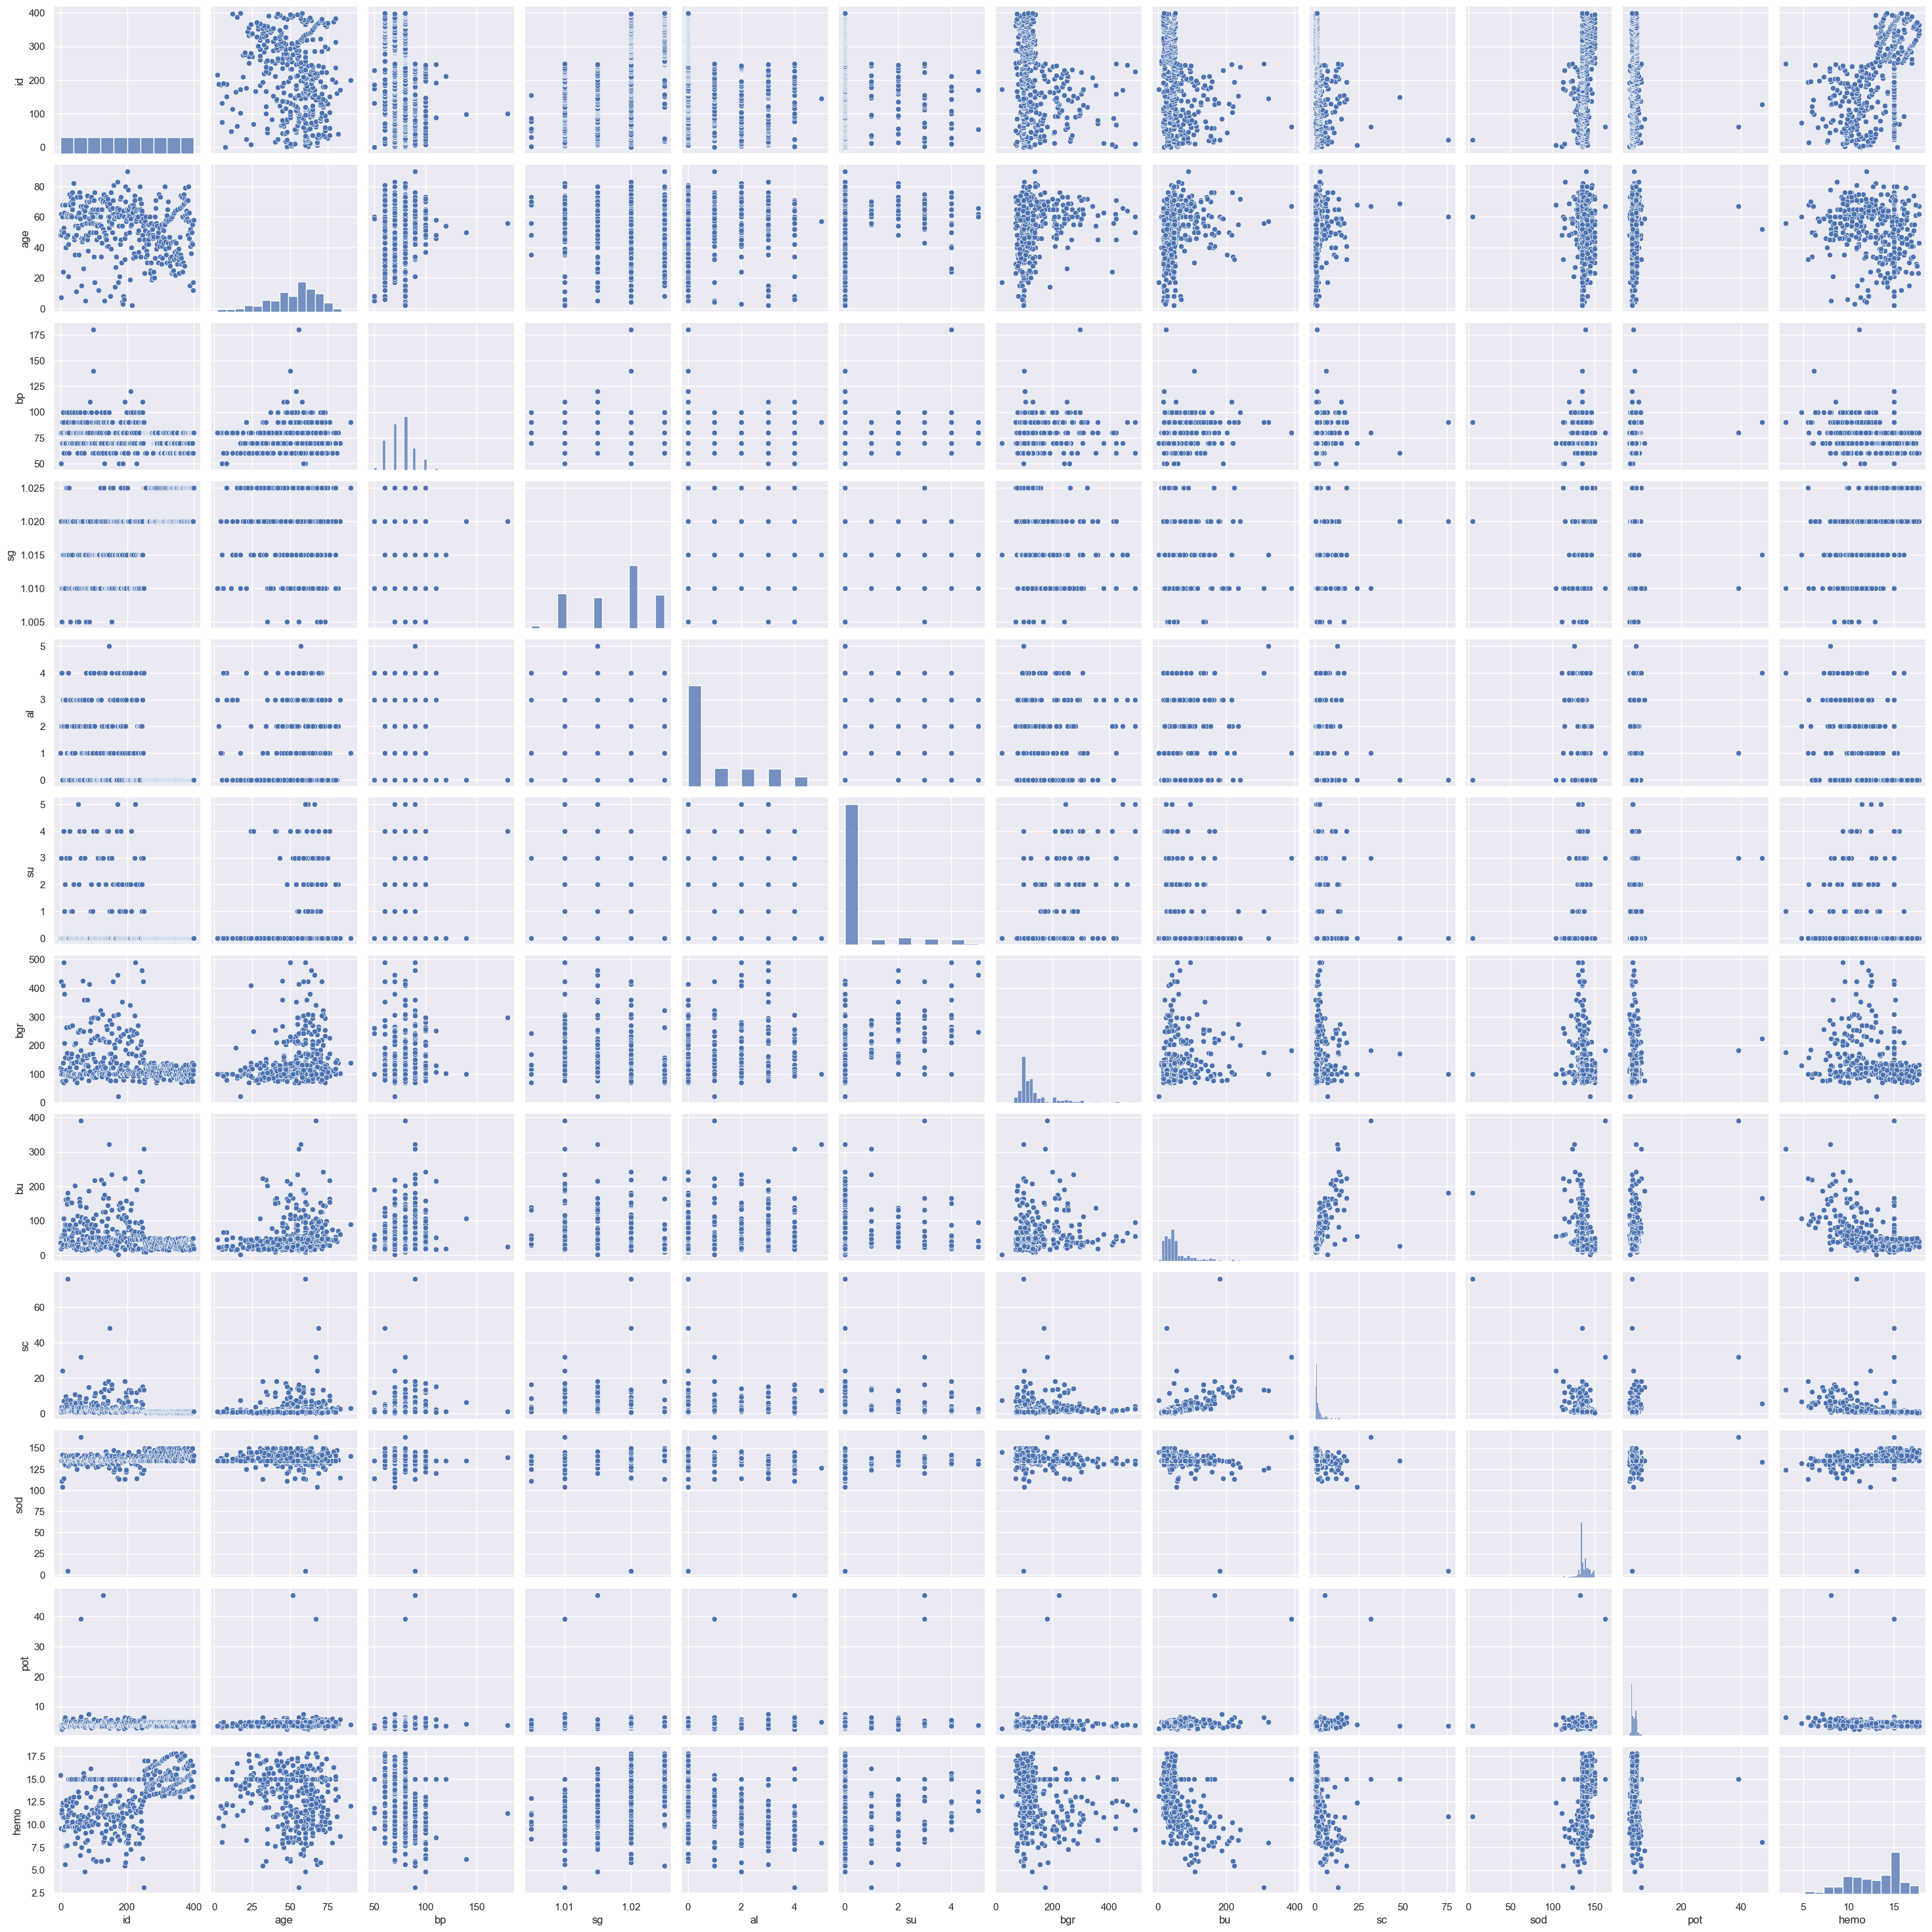

In [16]:
sns.pairplot(df_imputed)

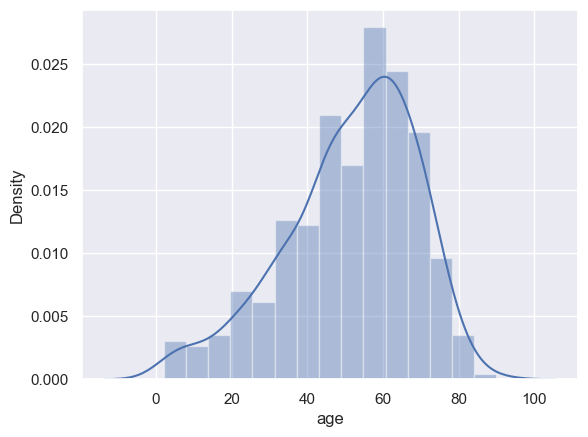

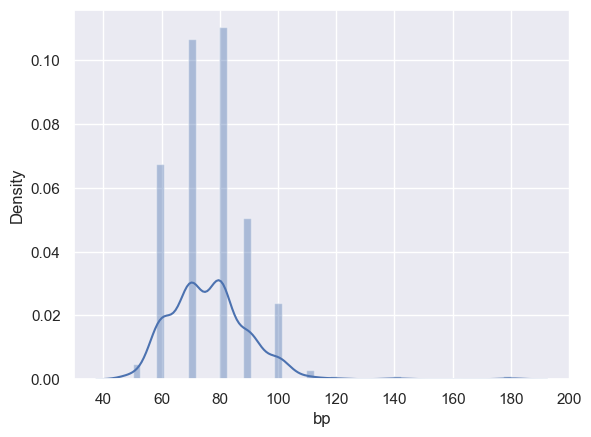

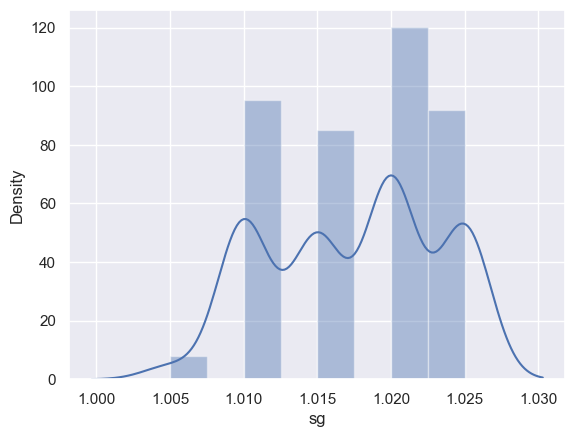

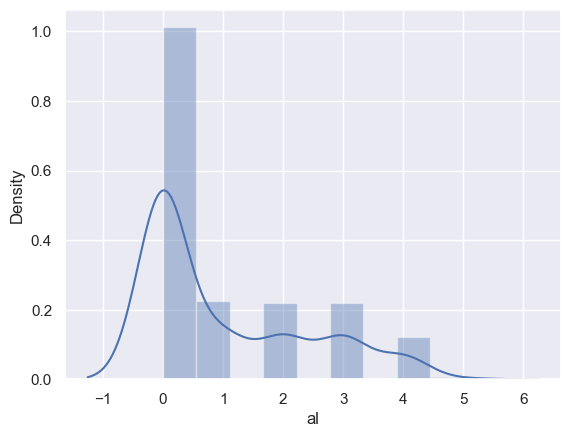

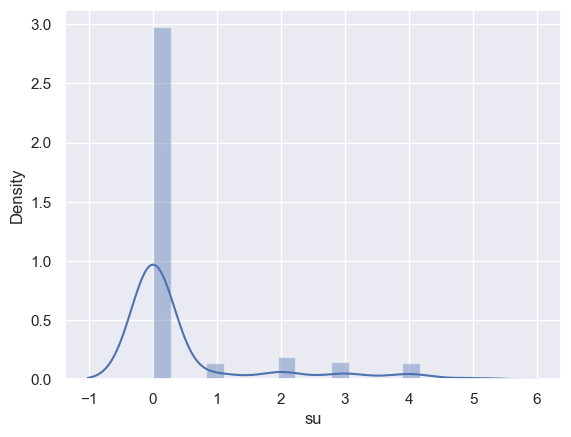

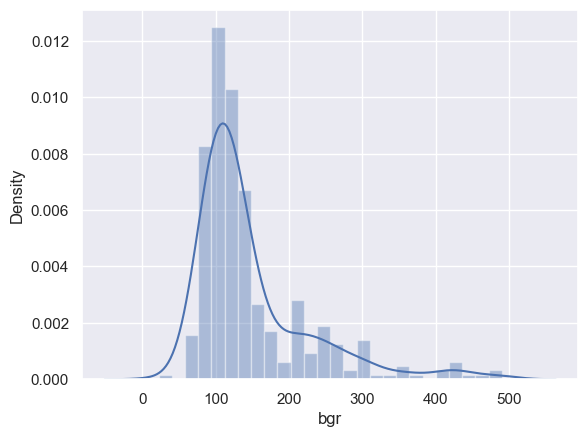

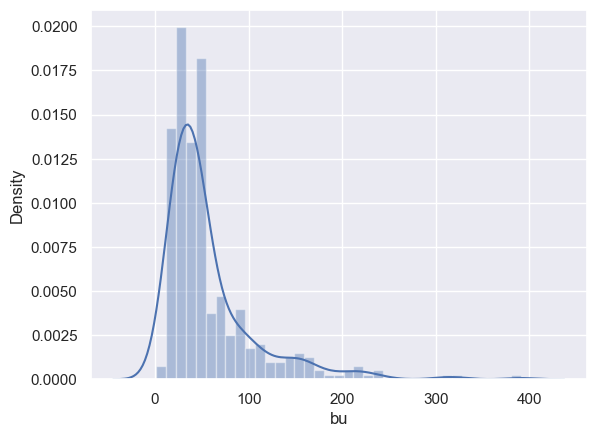

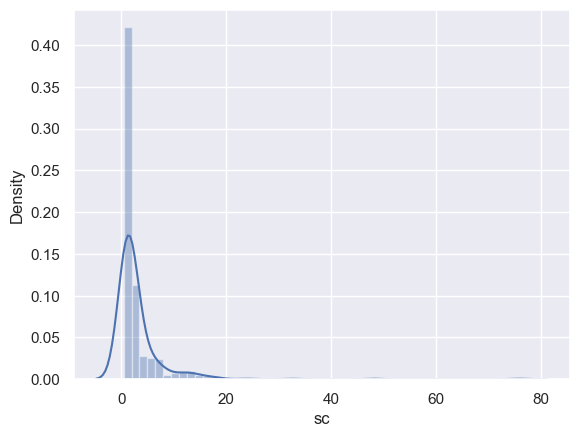

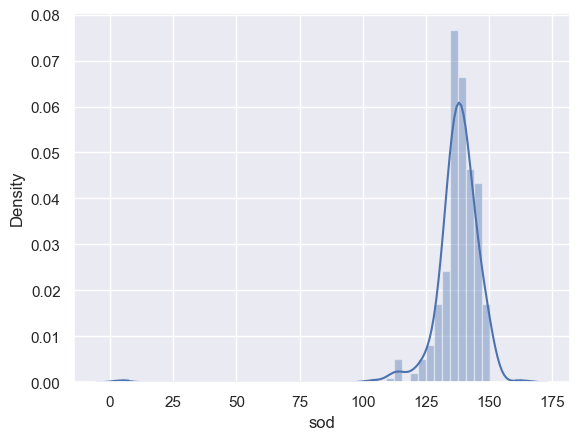

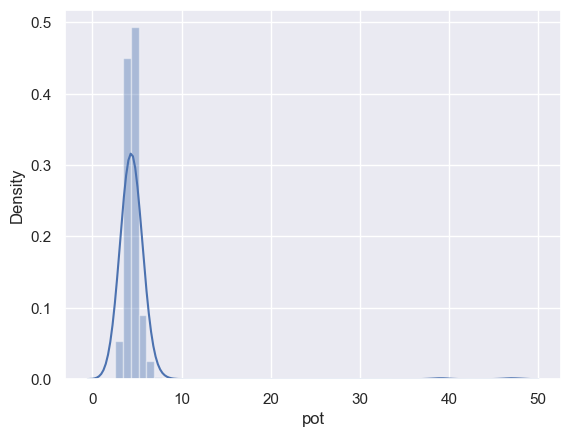

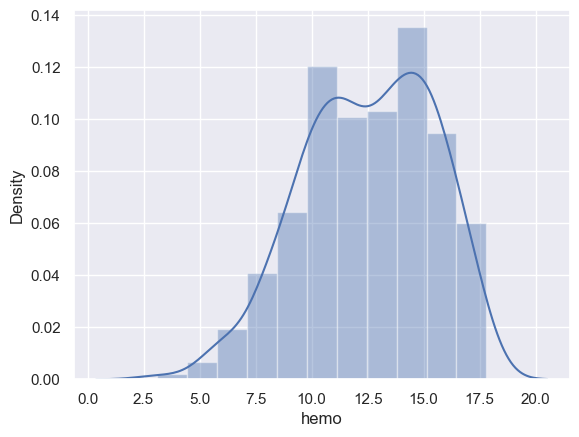

In [18]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

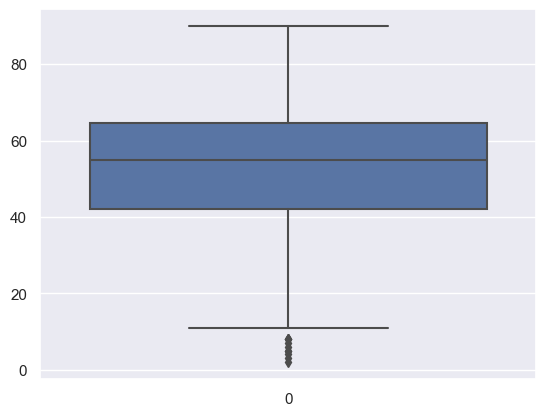

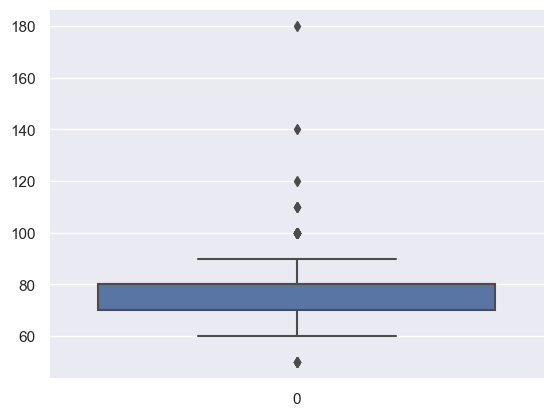

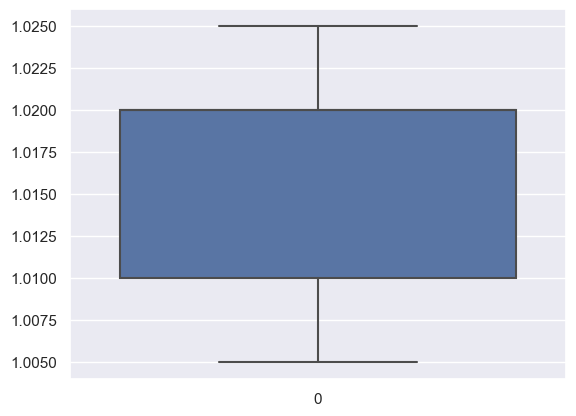

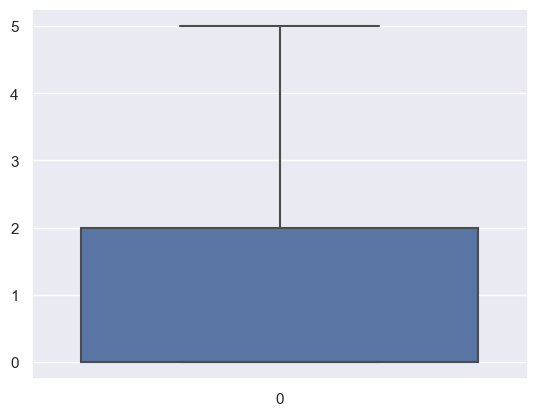

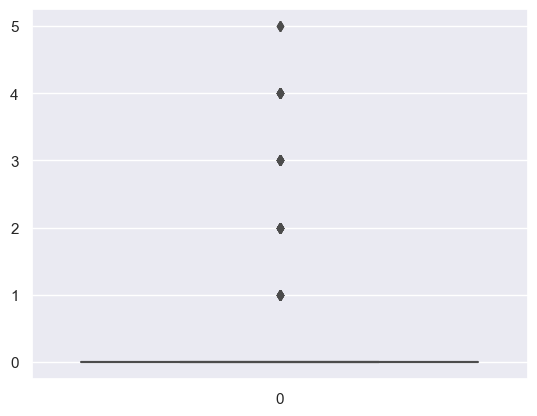

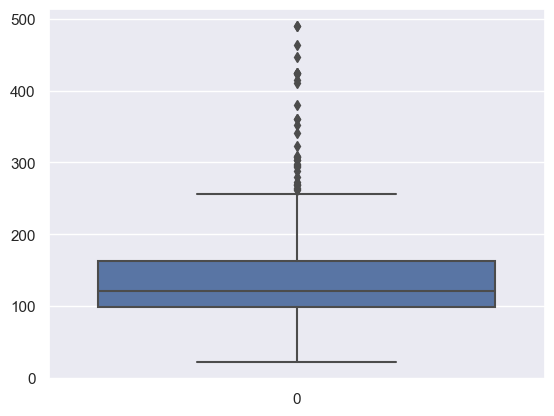

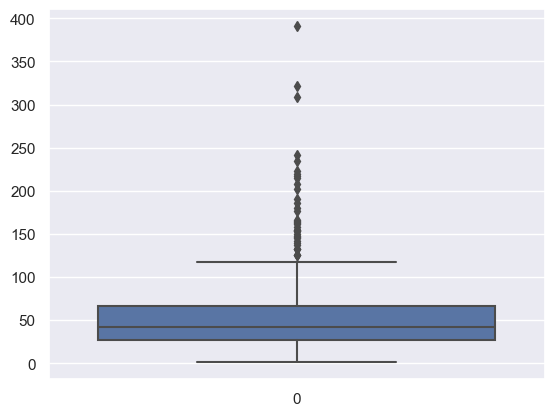

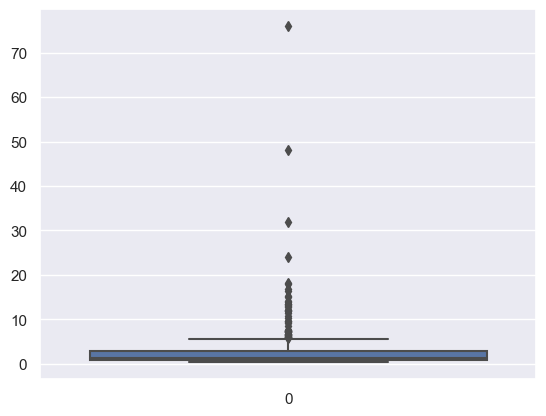

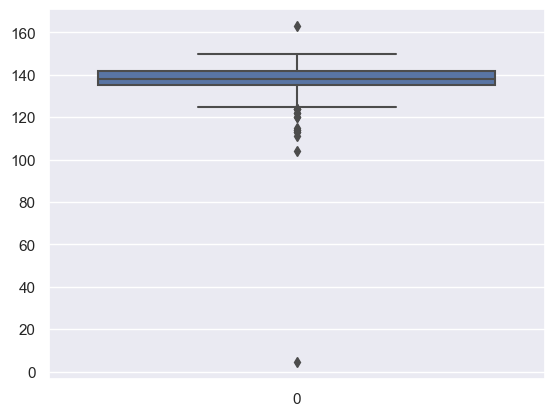

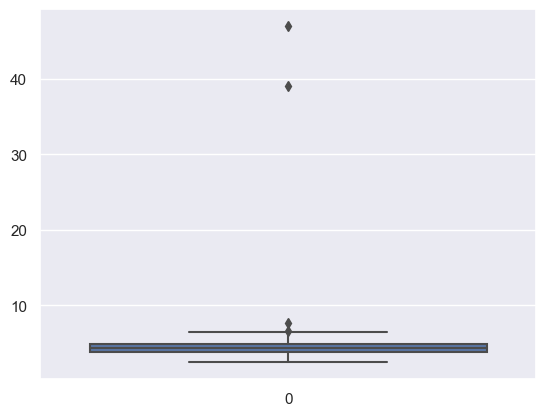

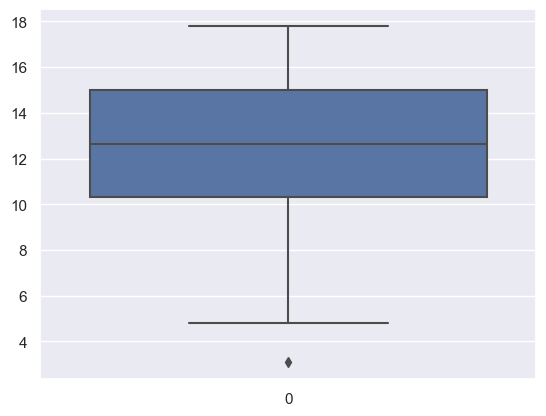

In [19]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [20]:
# print(df_imputed)
df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
df_enco.to_csv("Kidney-Disease-Preprocessed.csv")

<AxesSubplot: >

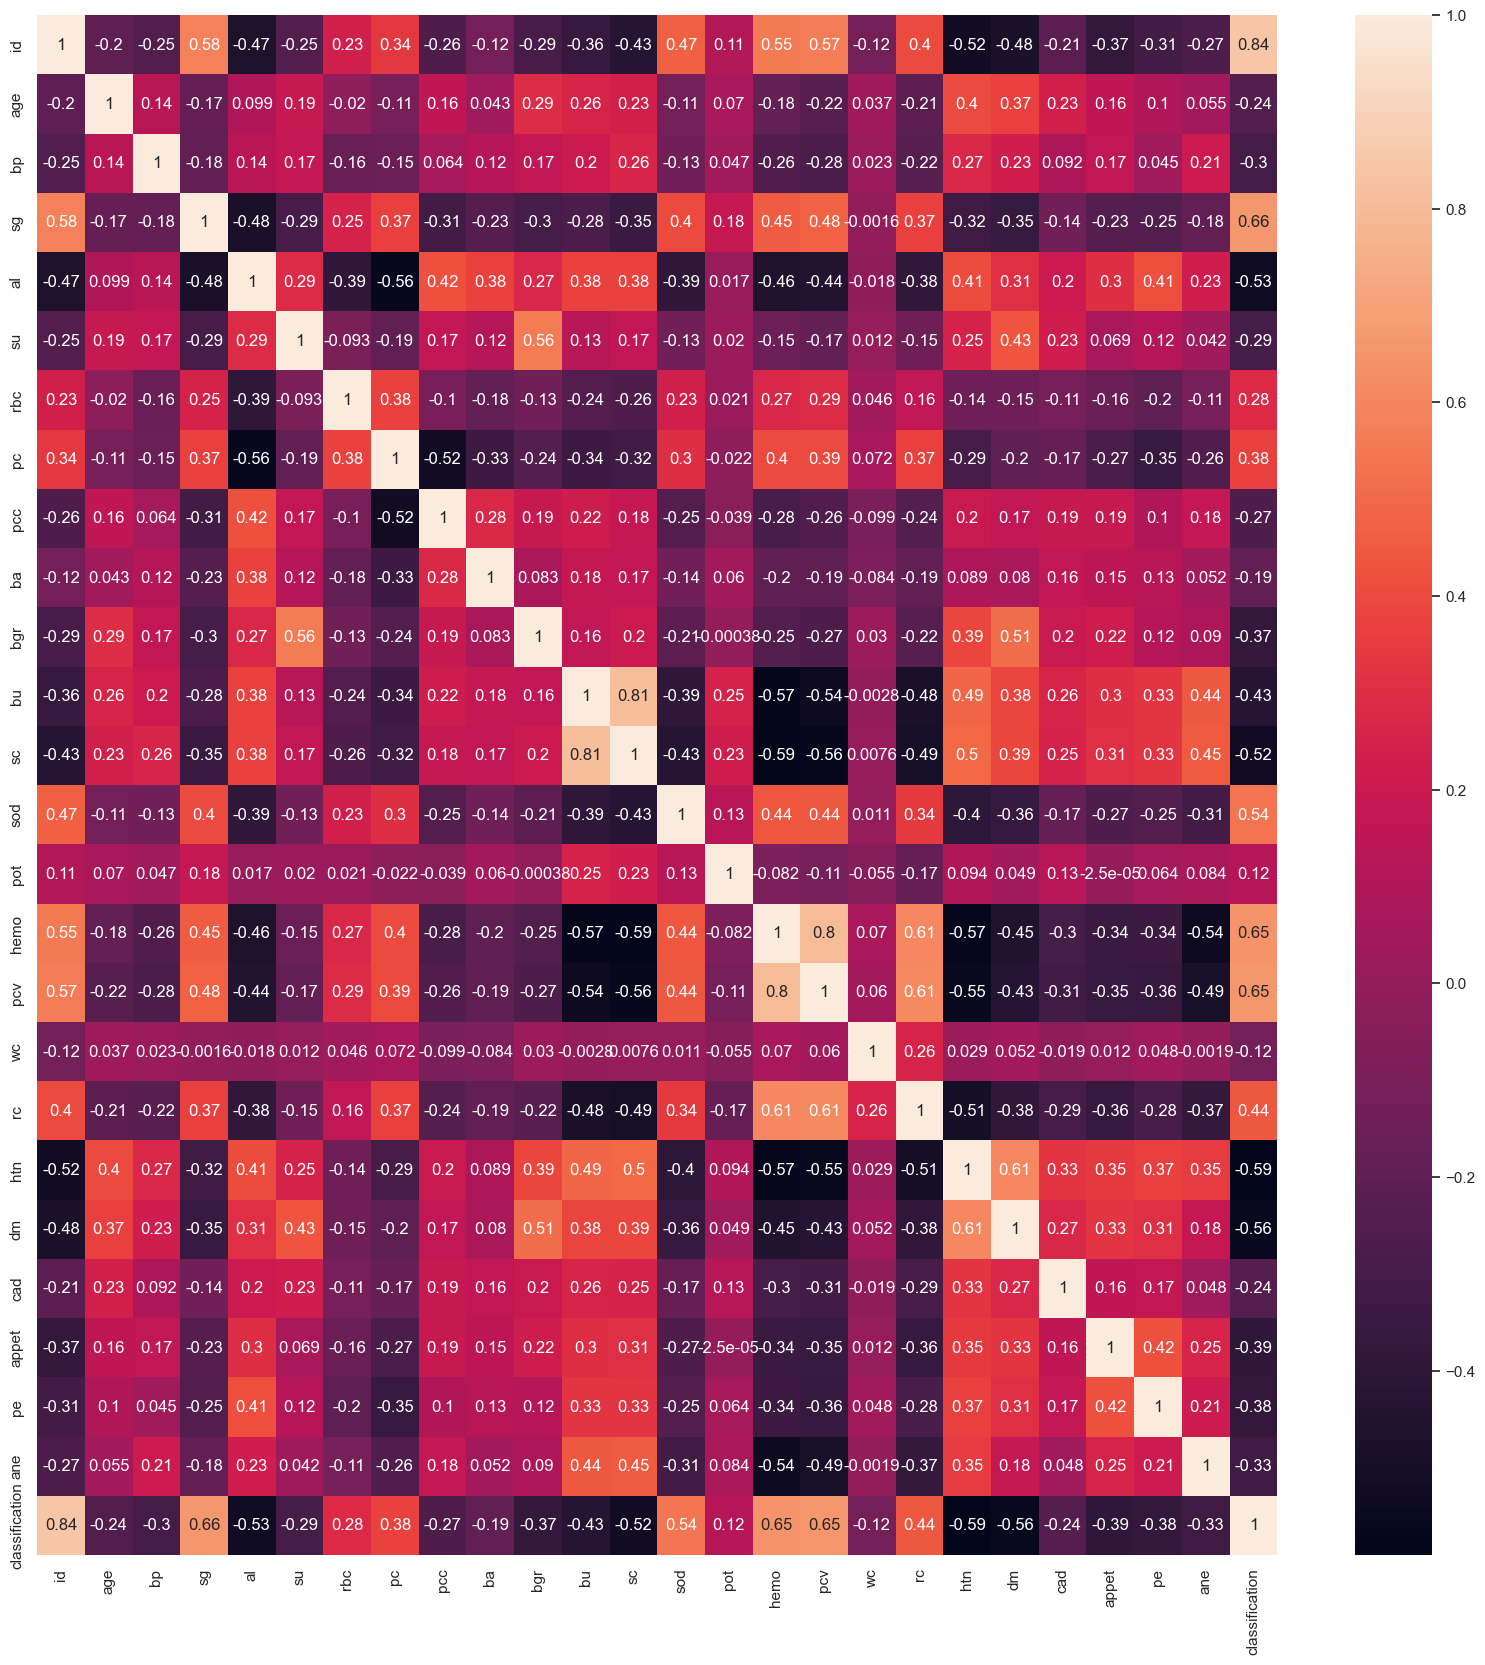

In [22]:
plt.figure(figsize=(20,20))
corr = df_enco.corr()
sns.heatmap(corr,annot=True)

In [23]:
# Lets make some final chahnges to data
# separating of input and output variables / attributes

x = df_enco.drop(["id","classification"],axis=1)
y = df_enco["classification"]

In [24]:
# lets detect label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [25]:
# lets balance the labels

ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [26]:
scalar = MinMaxScaler((-1,1))
x = scalar.fit_transform(x_ros)
y = y_ros

In [28]:
# Applying PCA
# The code below has .95 for the number of components parameter
# It mens that scikit-learn choose the minnimum number of principal components such that 95% of the variance is reatained

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go 
import plotly.tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [30]:
# with pca
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model

from keras.optimizers import Adam
from sklearn.model_selection 